Deep Learning
=============

Assignment 1
------------

The objective of this assignment is to learn about simple data curation practices, and familiarize you with some of the data we'll be reusing later.

This notebook uses the [notMNIST](http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html) dataset to be used with python experiments. This dataset is designed to look like the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset, while looking a little more like real data: it's a harder task, and the data is a lot less 'clean' than MNIST.

In [1]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import tarfile
from IPython.display import display, Image
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

First, we'll download the dataset to our local machine. The data consists of characters rendered in a variety of fonts on a 28x28 image. The labels are limited to 'A' through 'J' (10 classes). The training set has about 500k and the testset 19000 labelled examples. Given these sizes, it should be possible to train models quickly on any machine.

In [2]:
url = 'http://commondatastorage.googleapis.com/books1000/'
last_percent_reported = None

def download_progress_hook(count, blockSize, totalSize):
  """A hook to report the progress of a download. This is mostly intended for users with
  slow internet connections. Reports every 5% change in download progress.
  """
  global last_percent_reported
  percent = int(count * blockSize * 100 / totalSize)

  if last_percent_reported != percent:
    if percent % 5 == 0:
      sys.stdout.write("%s%%" % percent)
      sys.stdout.flush()
    else:
      sys.stdout.write(".")
      sys.stdout.flush()
      
    last_percent_reported = percent
        
def maybe_download(filename, expected_bytes, force=False):
  """Download a file if not present, and make sure it's the right size."""
  if force or not os.path.exists(filename):
    print('Attempting to download:', filename) 
    filename, _ = urlretrieve(url + filename, filename, reporthook=download_progress_hook)
    print('\nDownload Complete!')
  statinfo = os.stat(filename)
  if statinfo.st_size == expected_bytes:
    print('Found and verified', filename)
  else:
    raise Exception(
      'Failed to verify ' + filename + '. Can you get to it with a browser?')
  return filename

train_filename = maybe_download('notMNIST_large.tar.gz', 247336696)
test_filename = maybe_download('notMNIST_small.tar.gz', 8458043)

Attempting to download: notMNIST_large.tar.gz
0%....5%....10%....15%....20%....25%....30%....35%....40%....45%....50%....55%....60%....65%....70%....75%....80%....85%....90%....95%....100%
Download Complete!
Found and verified notMNIST_large.tar.gz
Attempting to download: notMNIST_small.tar.gz
0%....5%....10%....15%....20%....25%....30%....35%....40%....45%....50%....55%....60%....65%....70%....75%....80%....85%....90%....95%....100%
Download Complete!
Found and verified notMNIST_small.tar.gz


Extract the dataset from the compressed .tar.gz file.
This should give you a set of directories, labelled A through J.

In [2]:
num_classes = 10
np.random.seed(133)

def maybe_extract(filename, force=False):
  root = os.path.splitext(os.path.splitext(filename)[0])[0]  # remove .tar.gz
  if os.path.isdir(root) and not force:
    # You may override by setting force=True.
    print('%s already present - Skipping extraction of %s.' % (root, filename))
  else:
    print('Extracting data for %s. This may take a while. Please wait.' % root)
    tar = tarfile.open(filename)
    sys.stdout.flush()
    tar.extractall()
    tar.close()
  data_folders = [
    os.path.join(root, d) for d in sorted(os.listdir(root))
    if os.path.isdir(os.path.join(root, d))]
  if len(data_folders) != num_classes:
    raise Exception(
      'Expected %d folders, one per class. Found %d instead.' % (
        num_classes, len(data_folders)))
  print(data_folders)
  return data_folders
  
train_folders = maybe_extract(train_filename)
test_folders = maybe_extract(test_filename)

NameError: name 'train_filename' is not defined

---
Problem 1
---------

Let's take a peek at some of the data to make sure it looks sensible. Each exemplar should be an image of a character A through J rendered in a different font. Display a sample of the images that we just downloaded. Hint: you can use the package IPython.display.

---

In [19]:
import os, sys
print( os.getcwd() ) # let's see where we are in the local directory
os.listdir( os.getcwd() )

/home/topolo/PropD/deep-learning--ud730/Lessons


['1_notmnist.ipynb',
 '1 From Machine Learning to Deep Learning.ipynb',
 'notMNIST_large',
 'notMNIST_small.tar.gz',
 '.ipynb_checkpoints',
 'notMNIST_large.tar.gz',
 'notMNIST_small']

In [10]:
notMNIST_smallAlistfiles = os.listdir('./notMNIST_small/A'); len( notMNIST_smallAlistfiles) # lots of files!

1873

In [14]:
notMNIST_smallAlistfiles.index("Q0NXaWxkV29yZHMtQm9sZEl0YWxpYy50dGY=.png") != 0 # check to see if it's there or not

True

[How to Include image or picture in jupyter notebook](http://stackoverflow.com/questions/32370281/how-to-include-image-or-picture-in-jupyter-notebook)  
```  
![title](img/picture.png)  
```

In [22]:
!["Q0NXaWxkV29yZHMtQm9sZEl0YWxpYy50dGY=.png"](notMNIST_small/A/Q0NXaWxkV29yZHMtQm9sZEl0YWxpYy50dGY=.png)

/usr/bin/sh: -c: line 0: syntax error near unexpected token `notMNIST_small/A/Q0NXaWxkV29yZHMtQm9sZEl0YWxpYy50dGY=.png'
/usr/bin/sh: -c: line 0: `["Q0NXaWxkV29yZHMtQm9sZEl0YWxpYy50dGY=.png"](notMNIST_small/A/Q0NXaWxkV29yZHMtQm9sZEl0YWxpYy50dGY=.png)'


Huh?  Let's try iPython

In [23]:
from IPython.display import display, Image

In [25]:
display(Image(filename="notMNIST_small/A/Q0NXaWxkV29yZHMtQm9sZEl0YWxpYy50dGY=.png"))

In [26]:
display(Image(filename="notMNIST_small/B/Q2FsaWd1bGEgUmVndWxhci50dGY=.png"))

In [27]:
display(Image(filename="notMNIST_small/C/QmVlc2tuZWVzQy5vdGY=.png"))

Now let's load the data in a more manageable format. Since, depending on your computer setup you might not be able to fit it all in memory, we'll load each class into a separate dataset, store them on disk and curate them independently. Later we'll merge them into a single dataset of manageable size.

We'll convert the entire dataset into a 3D array (image index, x, y) of floating point values, normalized to have approximately zero mean and standard deviation ~0.5 to make training easier down the road. 

A few images might not be readable, we'll just skip them.

In [3]:
image_size = 28  # Pixel width and height.
pixel_depth = 255.0  # Number of levels per pixel.

def load_letter(folder, min_num_images):
  """Load the data for a single letter label."""
  image_files = os.listdir(folder)
  dataset = np.ndarray(shape=(len(image_files), image_size, image_size),
                         dtype=np.float32)
  print(folder)
  num_images = 0
  for image in image_files:
    image_file = os.path.join(folder, image)
    try:
      image_data = (ndimage.imread(image_file).astype(float) - 
                    pixel_depth / 2) / pixel_depth
      if image_data.shape != (image_size, image_size):
        raise Exception('Unexpected image shape: %s' % str(image_data.shape))
      dataset[num_images, :, :] = image_data
      num_images = num_images + 1
    except IOError as e:
      print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')
    
  dataset = dataset[0:num_images, :, :]
  if num_images < min_num_images:
    raise Exception('Many fewer images than expected: %d < %d' %
                    (num_images, min_num_images))
    
  print('Full dataset tensor:', dataset.shape)
  print('Mean:', np.mean(dataset))
  print('Standard deviation:', np.std(dataset))
  return dataset
        
def maybe_pickle(data_folders, min_num_images_per_class, force=False):
  dataset_names = []
  for folder in data_folders:
    set_filename = folder + '.pickle'
    dataset_names.append(set_filename)
    if os.path.exists(set_filename) and not force:
      # You may override by setting force=True.
      print('%s already present - Skipping pickling.' % set_filename)
    else:
      print('Pickling %s.' % set_filename)
      dataset = load_letter(folder, min_num_images_per_class)
      try:
        with open(set_filename, 'wb') as f:
          pickle.dump(dataset, f, pickle.HIGHEST_PROTOCOL)
      except Exception as e:
        print('Unable to save data to', set_filename, ':', e)
  
  return dataset_names

train_datasets = maybe_pickle(train_folders, 45000)
test_datasets = maybe_pickle(test_folders, 1800)

NameError: name 'train_folders' is not defined

---
Problem 2
---------

Let's verify that the data still looks good. Displaying a sample of the labels and images from the ndarray. Hint: you can use matplotlib.pyplot.

---

cf. [Problem 2: Verify normalized images](https://classroom.udacity.com/courses/ud730/lessons/7320377048/concepts/8281ec8d-a3f4-49f4-8a11-5f59ef3c89a7#)  

EY : 20170126 Notice this line in `load_letter` above:

```  
image_data = (ndimage.imread(image_file).astype(float) - pixel_depth / 2) / pixel_depth  
```  
as noted by Vincent in the Instructor's comments below the video.  

We've then stacked all the images for each letter into a giant three-dimensional tensor and pickled it. Saving these tensors to disk allows us to reduce our memory footprint.  

```  
dataset[num_images, :, :] = image_data
num_images = num_images + 1
...
with open(set_filename, 'wb') as f:
    pickle.dump(dataset, f, pickle.HIGHEST_PROTOCOL)  
```

Now, to retrieve a normalized image, we need to read back a pickle file (there is one per dataset folder or letter) into a tensor and grab a slice from it. We can then display the slice using imshow() from matplotlib.pyplot (imported previously as plt).

In [28]:
pickle_file = train_datasets[0]  # index 0 should be all As, 1 = all Bs, etc.

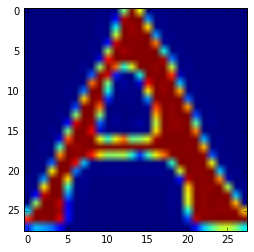

In [29]:
with open(pickle_file, 'rb') as f:
    letter_set = pickle.load(f)  # unpickle
    sample_idx = np.random.randint(len(letter_set))  # pick a random image index
    sample_image = letter_set[sample_idx, :, :]  # extract a 2D slice
    plt.figure()
    plt.imshow(sample_image)  # display it

52909


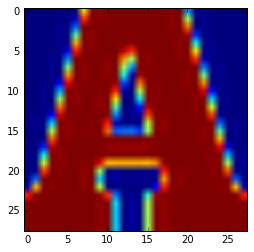

In [35]:
print( len(letter_set)); # length of letter_set 
plt.imshow( letter_set[0,:,:]); plt.imshow( letter_set[ len(letter_set)/26*18,:,:]) 

In [37]:
f.close()

In [49]:
pickle_files = [train_datasets[i] for i in range(len(train_datasets))] # A,B,C,D,E,F,G,H,I,J

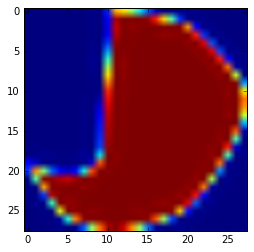

In [50]:
with open(pickle_files[8], 'rb') as f:
    letter_set = pickle.load(f)  # unpickle
    sample_idx = np.random.randint(len(letter_set))  # pick a random image index
    sample_image = letter_set[sample_idx, :, :]  # extract a 2D slice
    plt.figure()
    plt.imshow(sample_image)  # display it

f.close()

---
Problem 3
---------
Another check: we expect the data to be balanced across classes. Verify that.

---

In [42]:
len(train_datasets)

10

In [52]:
for i in range(len(train_datasets)):
    print("For training set", i)
    with open( train_datasets[i], 'rb') as f:
        letter_set = pickle.load(f) # unpickle
        print( " , ", len(letter_set), " \n")
    f.close()
        

For training set 0
 ,  52909  

For training set 1
 ,  52911  

For training set 2
 ,  52912  

For training set 3
 ,  52911  

For training set 4
 ,  52912  

For training set 5
 ,  52912  

For training set 6
 ,  52912  

For training set 7
 ,  52912  

For training set 8
 ,  52912  

For training set 9
 ,  52911  



Merge and prune the training data as needed. Depending on your computer setup, you might not be able to fit it all in memory, and you can tune `train_size` as needed. The labels will be stored into a separate array of integers 0 through 9.

Also create a validation dataset for hyperparameter tuning.

In [53]:
def make_arrays(nb_rows, img_size):
  if nb_rows:
    dataset = np.ndarray((nb_rows, img_size, img_size), dtype=np.float32)
    labels = np.ndarray(nb_rows, dtype=np.int32)
  else:
    dataset, labels = None, None
  return dataset, labels

def merge_datasets(pickle_files, train_size, valid_size=0):
  num_classes = len(pickle_files)
  valid_dataset, valid_labels = make_arrays(valid_size, image_size)
  train_dataset, train_labels = make_arrays(train_size, image_size)
  vsize_per_class = valid_size // num_classes
  tsize_per_class = train_size // num_classes
    
  start_v, start_t = 0, 0
  end_v, end_t = vsize_per_class, tsize_per_class
  end_l = vsize_per_class+tsize_per_class
  for label, pickle_file in enumerate(pickle_files):       
    try:
      with open(pickle_file, 'rb') as f:
        letter_set = pickle.load(f)
        # let's shuffle the letters to have random validation and training set
        np.random.shuffle(letter_set)
        if valid_dataset is not None:
          valid_letter = letter_set[:vsize_per_class, :, :]
          valid_dataset[start_v:end_v, :, :] = valid_letter
          valid_labels[start_v:end_v] = label
          start_v += vsize_per_class
          end_v += vsize_per_class
                    
        train_letter = letter_set[vsize_per_class:end_l, :, :]
        train_dataset[start_t:end_t, :, :] = train_letter
        train_labels[start_t:end_t] = label
        start_t += tsize_per_class
        end_t += tsize_per_class
    except Exception as e:
      print('Unable to process data from', pickle_file, ':', e)
      raise
    
  return valid_dataset, valid_labels, train_dataset, train_labels
            
            
train_size = 200000
valid_size = 10000
test_size = 10000

valid_dataset, valid_labels, train_dataset, train_labels = merge_datasets(
  train_datasets, train_size, valid_size)
_, _, test_dataset, test_labels = merge_datasets(test_datasets, test_size)

print('Training:', train_dataset.shape, train_labels.shape)
print('Validation:', valid_dataset.shape, valid_labels.shape)
print('Testing:', test_dataset.shape, test_labels.shape)

Training: (200000, 28, 28) (200000,)
Validation: (10000, 28, 28) (10000,)
Testing: (10000, 28, 28) (10000,)


Next, we'll randomize the data. It's important to have the labels well shuffled for the training and test distributions to match.

In [54]:
def randomize(dataset, labels):
  permutation = np.random.permutation(labels.shape[0])
  shuffled_dataset = dataset[permutation,:,:]
  shuffled_labels = labels[permutation]
  return shuffled_dataset, shuffled_labels
train_dataset, train_labels = randomize(train_dataset, train_labels)
test_dataset, test_labels = randomize(test_dataset, test_labels)
valid_dataset, valid_labels = randomize(valid_dataset, valid_labels)

---
Problem 4
---------
Convince yourself that the data is still good after shuffling!

---

In [61]:
print( type(train_dataset)); print( train_dataset.shape ); print( train_dataset.dtype); 
print( type(train_labels)); print( train_labels.dtype )

<type 'numpy.ndarray'>
(200000, 28, 28)
float32
<type 'numpy.ndarray'>
int32


In [73]:
print(np.mean(train_dataset, axis=0).shape); print(np.mean(train_dataset).shape); np.mean(train_dataset) 

(28, 28)
()


-0.082055762

In [74]:
print(np.mean(test_dataset, axis=0).shape); print(np.mean(test_dataset).shape); np.mean(test_dataset) 

(28, 28)
()


-0.074936807

In [76]:
print( np.mean(valid_dataset) ) ; print( np.var(train_dataset) ) ; print( np.var(test_dataset) ) ; 
print( np.var(valid_dataset) )

-0.0843664
0.206265
0.210201
0.206073


In [79]:
histtrain, binstrain = np.histogram( train_dataset)

<Container object of 10 artists>

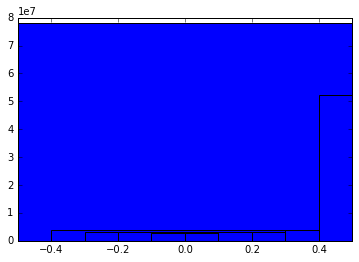

In [83]:
plt.xlim(min(binstrain), max(binstrain))
plt.bar( binstrain[:-1], histtrain, width = 1)

#plt.hist( histtrain, bins=binstrain)

#plt.bar(bin_edges[:-1], hist, width = 1)

<Container object of 10 artists>

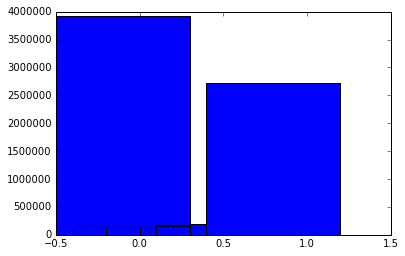

In [87]:
histtest, binstest = np.histogram( test_dataset)
plt.bar( binstest[:-1], histtest )


<Container object of 10 artists>

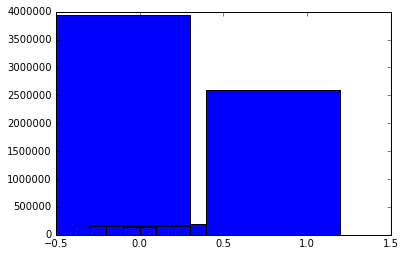

In [88]:
histvalid, binsvalid = np.histogram( valid_dataset)
plt.bar( binsvalid[:-1], histvalid )

In [92]:
print( histvalid )
binsvalid

[3933587  183292  157190  156606  145695  144712  164961  164939  193306
 2595712]


array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5])

Finally, let's save the data for later reuse:

In [55]:
pickle_file = 'notMNIST.pickle'

try:
  f = open(pickle_file, 'wb')
  save = {
    'train_dataset': train_dataset,
    'train_labels': train_labels,
    'valid_dataset': valid_dataset,
    'valid_labels': valid_labels,
    'test_dataset': test_dataset,
    'test_labels': test_labels,
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise

In [56]:
statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

Compressed pickle size: 690800441


---
Problem 5
---------

By construction, this dataset might contain a lot of overlapping samples, including training data that's also contained in the validation and test set! Overlap between training and test can skew the results if you expect to use your model in an environment where there is never an overlap, but are actually ok if you expect to see training samples recur when you use it.
Measure how much overlap there is between training, validation and test samples.

Optional questions:
- What about near duplicates between datasets? (images that are almost identical)
- Create a sanitized validation and test set, and compare your accuracy on those in subsequent assignments.
---

In [93]:
train_dataset.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False

In [108]:
train_dataset.flags.writeable=False
test_dataset.flags.writeable=False

In [111]:
dup_table = {}

In [112]:
for idx, img in enumerate(train_dataset):
    h = hash(img.data)
#    if h in dup_table and (train_dataset[dup_table[h]].data == img.data):
#        print( "Duplicate image: %d matches %d" % (idx, dup_table[h]) )
#        print (idx, dup_table[h])
    dup_table[h] = idx

In [113]:
howmanyduplicatesoftestintrain = 0
for idx, img in enumerate(test_dataset):
    h = hash(img.data)
    if h in dup_table and (train_dataset[dup_table[h]].data == img.data):
#        print( "Test image %d is in the training set" % idx)
        howmanyduplicatesoftestintrain+=1
    
print(howmanyduplicatesoftestintrain)

1285


In [115]:
help(hash)

Help on built-in function hash in module __builtin__:

hash(...)
    hash(object) -> integer
    
    Return a hash value for the object.  Two objects with the same value have
    the same hash value.  The reverse is not necessarily true, but likely.



In [122]:
import time
def fast_overlaps_num_set_and_hash(images1,images2):
    images1.flags.writeable=False
    images2.flags.writeable=False
    hash1 = set([hash(image1.data) for image1 in images1])
    hash2 = set([hash(image2.data) for image2 in images2])
    all_overlaps = set.intersection(hash1, hash2)
    return len(all_overlaps)

def find_dups_and_overlaps(images1, images2):
    images1.flags.writeable=False
    images2.flags.writeable=False
    dup_table={}
    duplicates1 = []
    for idx, img in enumerate(images1):
        h = hash(img.data)
        if h in dup_table and (images1[dup_table[h]].data == img.data):
            duplicates1.append((idx, dup_table[h]))
            #print 'Duplicate image: %d matches %d' % (idx, dup_table[h])
        dup_table[h] = idx
    overlaps = []
    for idx,img in enumerate(images2):
        h = hash(img.data)
        if h in dup_table and (images1[dup_table[h]].data == img.data):
            overlaps.append((dup_table[h], idx))
            #print 'Test image %d is in the training set' % idx
    return duplicates1, overlaps

def num_overlaps_with_diff_labels(overlap_indices, labels1, labels2):
    count = 0
    for olap in overlap_indices:
        if labels1[olap[0]] != labels2[olap[1]]:
            count += 1
    return count


In [124]:
print( "\nMethod 1: hash and check equality (via sets)"  )
t1 = time.time()
train_dups, train_valid_overlaps = find_dups_and_overlaps(train_dataset, valid_dataset)
test_dups, test_train_overlaps = find_dups_and_overlaps(test_dataset, train_dataset)
valid_dups, valid_test_overlaps = find_dups_and_overlaps(valid_dataset, test_dataset)
print( "train dups: %s, test_dups: %s, valid_dups: %s" % (len(train_dups), len(test_dups), len(valid_dups))  )
print( 'train/valid overlaps: %s, of which %s have different labels' % \
    (len(train_valid_overlaps), num_overlaps_with_diff_labels(train_valid_overlaps, train_labels, valid_labels))  )
print( 'test/train overlaps: %s, of which %s have different labels' % \
    (len(test_train_overlaps), num_overlaps_with_diff_labels(test_train_overlaps, test_labels, train_labels))  )
print( 'valid/test overlaps: %s, of which %s have different labels' % \
    (len(valid_test_overlaps), num_overlaps_with_diff_labels(valid_test_overlaps, valid_labels, test_labels))  )
t2 = time.time()
print("Time: %0.2fs" % (t2 - t1))


Method 1: hash and check equality (via sets)
train dups: 12681, test_dups: 208, valid_dups: 150
train/valid overlaps: 1131, of which 32 have different labels
test/train overlaps: 3538, of which 95 have different labels
valid/test overlaps: 211, of which 2 have different labels
Time: 1.81s


cf. [Assignment 1, Problem 5](https://discussions.udacity.com/t/assignment-1-problem-5/45657/21)

In [129]:
counter = 0 
whatisidx = []
whatisimg = []
for idx, img in enumerate(train_dataset):
    if counter < 3:
        whatisidx.append( idx)
        whatisimg.append( img)
    counter +=1 


In [142]:
print(whatisidx); print(whatisimg[0].shape ) ; 
whatisimg[0].max(), whatisimg[0].mean(), whatisimg[0].min(), whatisimg[0].std()

[0, 1, 2]
(28, 28)


(0.5, -0.20449179, -0.5, 0.40550232)

---
Problem 6
---------

Let's get an idea of what an off-the-shelf classifier can give you on this data. It's always good to check that there is something to learn, and that it's a problem that is not so trivial that a canned solution solves it.

Train a simple model on this data using 50, 100, 1000 and 5000 training samples. Hint: you can use the LogisticRegression model from sklearn.linear_model.

Optional question: train an off-the-shelf model on all the data!

---

In [4]:
print( type(train_dataset)); print( train_dataset.dtype); print( type(train_labels)); print( train_labels.dtype)

print( train_dataset.shape); print( train_labels.shape); 
print( train_labels.max(), train_labels.min(), train_labels.mean(), train_labels.std() )

NameError: name 'train_dataset' is not defined

In [32]:
import sklearn
from sklearn import linear_model

In [6]:
linlogreg = linear_model.LogisticRegression()  # C = 1.0 seems to be the default

reshape training data set, i.e.  

$
 [0,1]^{N^x} \times [0,1]^{N^y} \subset \mathbb{R}^{N^x} \times \mathbb{R}^{N^y} \to [0,1]^{ N^x*N^y } \subset \mathbb{R}^{ N^x*N^y}
 $

In [19]:
train_dataset_lin = train_dataset.reshape( train_dataset.shape[0], train_dataset.shape[1]*train_dataset.shape[2])
print( len(train_dataset_lin))

200000


In [26]:
test_dataset_lin = test_dataset.reshape( test_dataset.shape[0], test_dataset.shape[1]*test_dataset.shape[2])
print( len(test_dataset_lin))
valid_dataset_lin = valid_dataset.reshape( valid_dataset.shape[0], valid_dataset.shape[1]* valid_dataset.shape[2])
print( len( valid_dataset_lin))

10000
10000


In [18]:
import random
len(random.sample(range(len(train_labels)), 50))

50

In [23]:
num_train_lst = [50,100,250,500,1000,2500,5000,10000]
indices_train_0 = random.sample(range(len(train_labels)), num_train_lst[0])

In [27]:
linlogreg.fit( train_dataset_lin[indices_train_0,:], train_labels[indices_train_0] )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
res_train = linlogreg.predict( train_dataset_lin)
print( type(res_train)); len(res_train)

<type 'numpy.ndarray'>


200000

In [30]:
linlogreg.score( train_dataset_lin, train_labels)

0.57291999999999998

In [33]:
sklearn.metrics.accuracy_score( train_labels, res_train)

0.57291999999999998

In [34]:
linlogreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [35]:
print( linlogreg.score( test_dataset_lin, test_labels) ); 
print( linlogreg.score( valid_dataset_lin, valid_labels) ); 


0.6254
0.5759


### In case we need to reload from the saved pickle 

In [7]:
import os, sys
print( os.getcwd() ) # let's see where we are in the local directory
os.listdir( os.getcwd() )

/home/topolo/PropD/deep-learning--ud730/Lessons


['1_notmnist.ipynb',
 '1 From Machine Learning to Deep Learning.ipynb',
 'notMNIST_large',
 'notMNIST_small.tar.gz',
 '.ipynb_checkpoints',
 'notMNIST_large.tar.gz',
 'notMNIST.pickle',
 'notMNIST_small']

In [8]:
with open("notMNIST.pickle", 'rb') as f:
    notMNISTpkl = pickle.load(f)  # unpickle

In [10]:
print( type(notMNISTpkl) ); notMNISTpkl.keys()

<type 'dict'>


['train_labels',
 'valid_labels',
 'test_labels',
 'test_dataset',
 'train_dataset',
 'valid_dataset']

In [13]:
train_labels = notMNISTpkl["train_labels"]
train_dataset = notMNISTpkl["train_dataset"]
print( type(train_labels) ) ; print( type(train_dataset) )

<type 'numpy.ndarray'>
<type 'numpy.ndarray'>


In [25]:
test_labels = notMNISTpkl["test_labels"]
test_dataset = notMNISTpkl["test_dataset"]
valid_labels = notMNISTpkl["valid_labels"]
valid_dataset = notMNISTpkl["valid_dataset"]